# Saturating Forecasts

## Forecasting Growth

Theo mặc đinh, Prophet sử dụng mô hình tuyến tính (linear) để dự báo. Khi dự báo tăng trưởng, thường có một số điểm tối đa có thể đạt được: tổng quy mô thị trường, tổng quy mô dân số... Đây được gọi là khả năng chuyên chở (carrying capacity) và dự báo sẽ bão hòa (saturate) tại điểm này.

Prophet cho phép bạn đưa ra dự báo bằng cách sử dụng mô hình xu hướng [logistic growth](https://en.wikipedia.org/wiki/Logistic_function), với một khả năng chuyên chở được chỉ định. Chúng ta minh họa điều này với nhật ký số lần truy cập vào trang [R(programming language)](https://en.wikipedia.org/wiki/R_%28programming_language%29) trên Wikipedia:

In [7]:
import pandas as pd
from prophet import Prophet

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv")
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


Chúng ta phải chỉ định khả năng chuyên trở trong cột `cap`. Ở đây, chúng tôi sẽ giả định một giá trị cụ thể, nhưng giá trị này thường được đặt bằng cách sử dụng dữ liệu hoặc kiến thức chuyên môn về thị trường.

In [5]:
df['cap']=8.5
df.head()

,ds,y,cap
0,2008-01-30,5.976351,8.5
1,2008-01-16,6.049733,8.5
2,2008-01-17,6.011267,8.5
3,2008-01-14,5.953243,8.5
4,2008-01-15,5.910797,8.5


Điều quan trọng cần lưu ý là giới hạn đó phải được chỉ định cho một hàng trong khung dữ liệu và nó không nhất thiết phải là hằng số. Nếu quy mô thị trường đang tăng lên, thì giới hạn có thể là một chuỗi tăng dần.

Sau đó, chúng ta điều chỉnh mô hình như trước, ngoại trừ chuyển vào đó một số đối số bổ sung để chỉ định logistic growth.

In [8]:
m=Prophet(growth='logistic')
m.fit(df)

20:46:40 - cmdstanpy - INFO - Chain [1] start processing
20:46:40 - cmdstanpy - INFO - Chain [1] done processing


Chúng ta tạo một dataframe cho các dự đoán trong tương lai như trước đây, ngoại trừ việc chung tôi cũng phải chỉ định dung lượng trong tương lai. Ở đây, chúng tôi giữ công suất không đổi ở cùng giá trị như trong lịch sử và dự báo 5 năm tới trong tương lai 

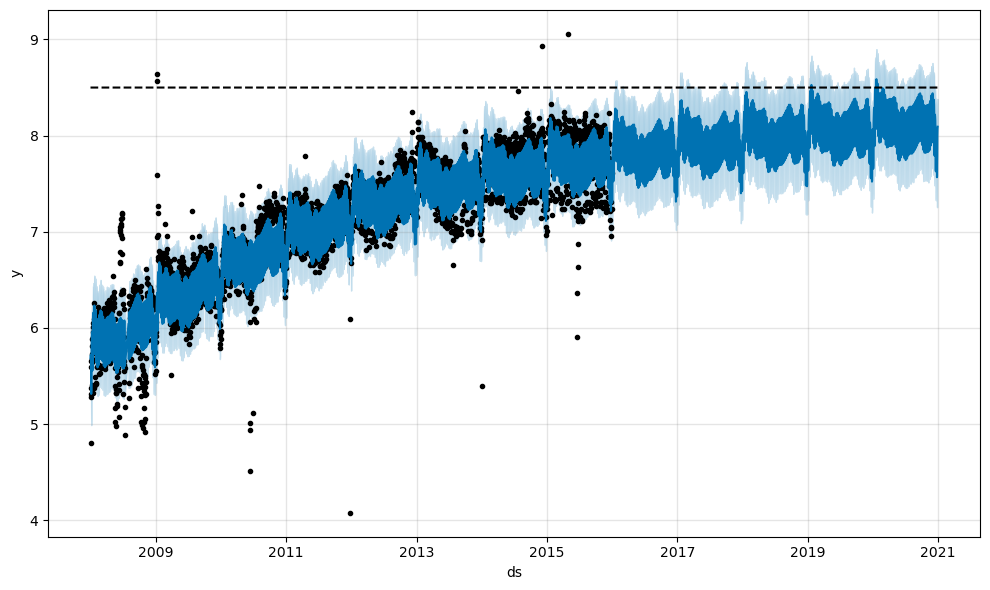

In [9]:
future=m.make_future_dataframe(periods=1826)
future['cap']=8.5
fcst=m.predict(future)
fig=m.plot(fcst)

Hàm logistic có mức tối thiểu ngầm định là 0 và sẽ bão hòa ở mức 0 giống như cách nó bão hòa ở công suất. Cũng có thể chỉ định một mức bão hòa minimum

## Saturating Minimum

Mô hình logistic growth cũng có thể xử lý mức tối thiểu bão hòa, được chỉ định với cột `floor` giống như cách cột `cap` chỉ định mức tối đa:

20:56:03 - cmdstanpy - INFO - Chain [1] start processing
20:56:04 - cmdstanpy - INFO - Chain [1] done processing


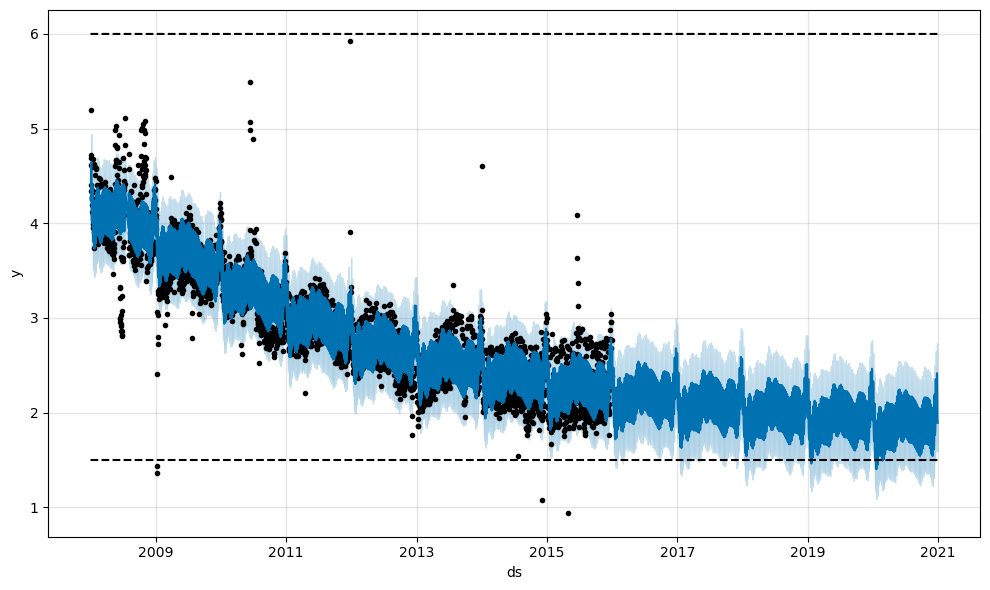

In [11]:
df['y']=10-df['y']
df['cap']=6
df['floor']=1.5
future['cap']=6
future['floor']=1.5
m=Prophet(growth='logistic')
m.fit(df)
fcst=m.predict(future)
fig=m.plot(fcst)

Để sử dụng logistic growth cho xu hướng với mức tối thiểu bão hòa, công suất tối đa cũng phải được chỉ định.